In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
data = pd.read_csv('/content/Market_data.csv')

In [30]:
data.head(10)

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price,sales,revenue
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000,985,6893000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000,834,4168000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000,726,5080000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000,749,5241000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000,721,86518000
5,Andaman and Nicobar,South Andaman,Port Blair,Bottle gourd,Other,04/03/2019,3000,4000,3500,934,3267000
6,Andaman and Nicobar,South Andaman,Port Blair,Brinjal,Other,04/03/2019,7000,8000,7500,917,6875500
7,Andaman and Nicobar,South Andaman,Port Blair,Cabbage,Other,04/03/2019,6000,7000,6500,843,5477500
8,Andaman and Nicobar,South Andaman,Port Blair,Carrot,Other,04/03/2019,9000,11000,10000,579,5788000
9,Andaman and Nicobar,South Andaman,Port Blair,Cauliflower,Other,04/03/2019,10000,12000,11000,749,8237000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   state         2238 non-null   object
 1   district      2238 non-null   object
 2   market        2238 non-null   object
 3   commodity     2238 non-null   object
 4   variety       2238 non-null   object
 5   arrival_date  2238 non-null   object
 6   min_price     2238 non-null   int64 
 7   max_price     2238 non-null   int64 
 8   modal_price   2238 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 157.5+ KB


In [11]:
data.describe()

,min_price,max_price,modal_price
count,2238.000000,2238.000000,2238.000000
mean,2456.230563,2855.890527,2698.865952
std,3452.497680,3917.251520,3694.830905
min,0.000000,0.000000,2.000000
25%,800.000000,1000.000000,950.000000
50%,1700.000000,1960.000000,1831.500000
75%,3200.000000,3700.000000,3500.000000
max,110000.000000,130000.000000,120000.000000


In [12]:
data.isnull()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2233,False,False,False,False,False,False,False,False,False
2234,False,False,False,False,False,False,False,False,False
2235,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False


In [13]:
# Function to calculate financial equation
# Financial equation: Revenue = Sales * Modal Price - Production Cost
def financial_equation(sales, modal_price, production_cost):
    return sales * modal_price - production_cost

In [14]:
production_cost = 2000 #assumption

In [15]:
data['sales'] = np.random.randint(500, 1000, size=len(data))

In [16]:
data['revenue'] = data.apply(lambda row: financial_equation(row['sales'], row['modal_price'], production_cost), axis=1)


In [17]:
data[['market', 'commodity', 'sales', 'modal_price', 'revenue']].head()

,market,commodity,sales,modal_price,revenue
0,Port Blair,Amaranthus,985,7000,6893000
1,Port Blair,Banana - Green,834,5000,4168000
2,Port Blair,Bhindi(Ladies Finger),726,7000,5080000
3,Port Blair,Bitter gourd,749,7000,5241000
4,Port Blair,Black pepper,721,120000,86518000


In [18]:
X = data[['min_price', 'max_price']]
y = data['modal_price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared}")

R-squared: 0.992317375070311


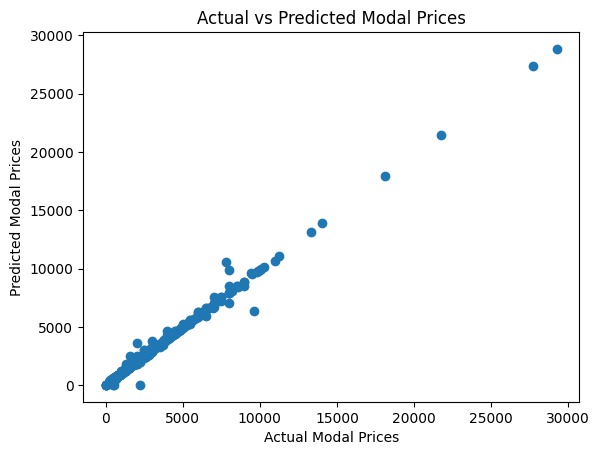

In [24]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Modal Prices")
plt.ylabel("Predicted Modal Prices")
plt.title("Actual vs Predicted Modal Prices")
plt.show()

In [27]:
commodity = "Banana - Green"
commodity_data = data[data['commodity'] == commodity]

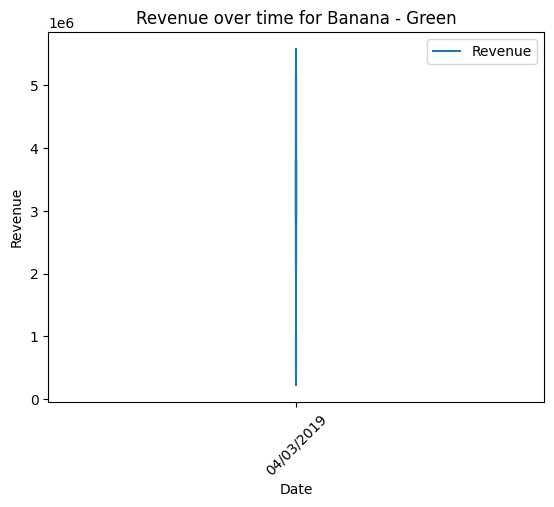

In [28]:
plt.plot(commodity_data['arrival_date'], commodity_data['revenue'], label='Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title(f'Revenue over time for {commodity}')
plt.legend()
plt.xticks(rotation=45)
plt.show()